# Import Python Libraries

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

from nltk.tokenize import sent_tokenize,word_tokenize,TreebankWordTokenizer
from nltk.stem import PorterStemmer,SnowballStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.manifold import TSNE

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [80]:
paragraph = '''Natural Language Processing (NLP) is a field of artificial intelligence, focused on the interaction between computers and human language. 
It allows machines to understand, interpret, and generate text in a meaningful way. 
Common applications include sentiment analysis, language translation, and chatbots. 
NLP uses techniques like tokenization, named entity recognition, and part-of-speech tagging. 
The goal is to bridge the gap between human communication and machine understanding, making interactions smoother and more efficient.'''

### Sentence Tokenization
* Paragraph to Sentences using Sent Tokenizer

In [81]:
sentences=sent_tokenize(paragraph)
sentences

['Natural Language Processing (NLP) is a field of artificial intelligence, focused on the interaction between computers and human language.',
 'It allows machines to understand, interpret, and generate text in a meaningful way.',
 'Common applications include sentiment analysis, language translation, and chatbots.',
 'NLP uses techniques like tokenization, named entity recognition, and part-of-speech tagging.',
 'The goal is to bridge the gap between human communication and machine understanding, making interactions smoother and more efficient.']

In [82]:
print(type(sentences))

<class 'list'>


In [83]:
for sentence in sentences:
    print (sentence)

Natural Language Processing (NLP) is a field of artificial intelligence, focused on the interaction between computers and human language.
It allows machines to understand, interpret, and generate text in a meaningful way.
Common applications include sentiment analysis, language translation, and chatbots.
NLP uses techniques like tokenization, named entity recognition, and part-of-speech tagging.
The goal is to bridge the gap between human communication and machine understanding, making interactions smoother and more efficient.


### Word Tokenization
* Paragraph to words using word tokenizer

In [84]:
words=word_tokenize(paragraph)
words

['Natural',
 'Language',
 'Processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'field',
 'of',
 'artificial',
 'intelligence',
 ',',
 'focused',
 'on',
 'the',
 'interaction',
 'between',
 'computers',
 'and',
 'human',
 'language',
 '.',
 'It',
 'allows',
 'machines',
 'to',
 'understand',
 ',',
 'interpret',
 ',',
 'and',
 'generate',
 'text',
 'in',
 'a',
 'meaningful',
 'way',
 '.',
 'Common',
 'applications',
 'include',
 'sentiment',
 'analysis',
 ',',
 'language',
 'translation',
 ',',
 'and',
 'chatbots',
 '.',
 'NLP',
 'uses',
 'techniques',
 'like',
 'tokenization',
 ',',
 'named',
 'entity',
 'recognition',
 ',',
 'and',
 'part-of-speech',
 'tagging',
 '.',
 'The',
 'goal',
 'is',
 'to',
 'bridge',
 'the',
 'gap',
 'between',
 'human',
 'communication',
 'and',
 'machine',
 'understanding',
 ',',
 'making',
 'interactions',
 'smoother',
 'and',
 'more',
 'efficient',
 '.']

* Sentence to words using word tokenizer

In [85]:
tokenized_words=[]
for i in range(len(sentences)):
    word=word_tokenize(sentences[i])
    tokenized_words.append(word)
tokenized_words

[['Natural',
  'Language',
  'Processing',
  '(',
  'NLP',
  ')',
  'is',
  'a',
  'field',
  'of',
  'artificial',
  'intelligence',
  ',',
  'focused',
  'on',
  'the',
  'interaction',
  'between',
  'computers',
  'and',
  'human',
  'language',
  '.'],
 ['It',
  'allows',
  'machines',
  'to',
  'understand',
  ',',
  'interpret',
  ',',
  'and',
  'generate',
  'text',
  'in',
  'a',
  'meaningful',
  'way',
  '.'],
 ['Common',
  'applications',
  'include',
  'sentiment',
  'analysis',
  ',',
  'language',
  'translation',
  ',',
  'and',
  'chatbots',
  '.'],
 ['NLP',
  'uses',
  'techniques',
  'like',
  'tokenization',
  ',',
  'named',
  'entity',
  'recognition',
  ',',
  'and',
  'part-of-speech',
  'tagging',
  '.'],
 ['The',
  'goal',
  'is',
  'to',
  'bridge',
  'the',
  'gap',
  'between',
  'human',
  'communication',
  'and',
  'machine',
  'understanding',
  ',',
  'making',
  'interactions',
  'smoother',
  'and',
  'more',
  'efficient',
  '.']]

In [86]:
tokenized_words[0]

['Natural',
 'Language',
 'Processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'field',
 'of',
 'artificial',
 'intelligence',
 ',',
 'focused',
 'on',
 'the',
 'interaction',
 'between',
 'computers',
 'and',
 'human',
 'language',
 '.']

#### Treebank Tokenizer

In [87]:
tokenizer=TreebankWordTokenizer()
tokenizer.tokenize(paragraph)

['Natural',
 'Language',
 'Processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'field',
 'of',
 'artificial',
 'intelligence',
 ',',
 'focused',
 'on',
 'the',
 'interaction',
 'between',
 'computers',
 'and',
 'human',
 'language.',
 'It',
 'allows',
 'machines',
 'to',
 'understand',
 ',',
 'interpret',
 ',',
 'and',
 'generate',
 'text',
 'in',
 'a',
 'meaningful',
 'way.',
 'Common',
 'applications',
 'include',
 'sentiment',
 'analysis',
 ',',
 'language',
 'translation',
 ',',
 'and',
 'chatbots.',
 'NLP',
 'uses',
 'techniques',
 'like',
 'tokenization',
 ',',
 'named',
 'entity',
 'recognition',
 ',',
 'and',
 'part-of-speech',
 'tagging.',
 'The',
 'goal',
 'is',
 'to',
 'bridge',
 'the',
 'gap',
 'between',
 'human',
 'communication',
 'and',
 'machine',
 'understanding',
 ',',
 'making',
 'interactions',
 'smoother',
 'and',
 'more',
 'efficient',
 '.']

### Stemming

In [88]:
stemmer=PorterStemmer()
stemmer.stem(paragraph)

'natural language processing (nlp) is a field of artificial intelligence, focused on the interaction between computers and human language. \nit allows machines to understand, interpret, and generate text in a meaningful way. \ncommon applications include sentiment analysis, language translation, and chatbots. \nnlp uses techniques like tokenization, named entity recognition, and part-of-speech tagging. \nthe goal is to bridge the gap between human communication and machine understanding, making interactions smoother and more efficient.'

In [89]:
for word in words:
    print(word+"------>"+stemmer.stem(word))

Natural------>natur
Language------>languag
Processing------>process
(------>(
NLP------>nlp
)------>)
is------>is
a------>a
field------>field
of------>of
artificial------>artifici
intelligence------>intellig
,------>,
focused------>focus
on------>on
the------>the
interaction------>interact
between------>between
computers------>comput
and------>and
human------>human
language------>languag
.------>.
It------>it
allows------>allow
machines------>machin
to------>to
understand------>understand
,------>,
interpret------>interpret
,------>,
and------>and
generate------>gener
text------>text
in------>in
a------>a
meaningful------>meaning
way------>way
.------>.
Common------>common
applications------>applic
include------>includ
sentiment------>sentiment
analysis------>analysi
,------>,
language------>languag
translation------>translat
,------>,
and------>and
chatbots------>chatbot
.------>.
NLP------>nlp
uses------>use
techniques------>techniqu
like------>like
tokenization------>token
,------>,

#### Snwball Stemmer

In [90]:
stemmer=SnowballStemmer('english')
for word in words:
    print(word+"---------->"+stemmer.stem(word))

Natural---------->natur
Language---------->languag
Processing---------->process
(---------->(
NLP---------->nlp
)---------->)
is---------->is
a---------->a
field---------->field
of---------->of
artificial---------->artifici
intelligence---------->intellig
,---------->,
focused---------->focus
on---------->on
the---------->the
interaction---------->interact
between---------->between
computers---------->comput
and---------->and
human---------->human
language---------->languag
.---------->.
It---------->it
allows---------->allow
machines---------->machin
to---------->to
understand---------->understand
,---------->,
interpret---------->interpret
,---------->,
and---------->and
generate---------->generat
text---------->text
in---------->in
a---------->a
meaningful---------->meaning
way---------->way
.---------->.
Common---------->common
applications---------->applic
include---------->includ
sentiment---------->sentiment
analysis---------->analysi
,---------->,
language---------->languag
tra

### Lemmatization

In [91]:
lemmatizer=WordNetLemmatizer()
for word in words:
    print(word+"----------->"+lemmatizer.lemmatize(word,pos='n'))

Natural----------->Natural
Language----------->Language
Processing----------->Processing
(----------->(
NLP----------->NLP
)----------->)
is----------->is
a----------->a
field----------->field
of----------->of
artificial----------->artificial
intelligence----------->intelligence
,----------->,
focused----------->focused
on----------->on
the----------->the
interaction----------->interaction
between----------->between
computers----------->computer
and----------->and
human----------->human
language----------->language
.----------->.
It----------->It
allows----------->allows
machines----------->machine
to----------->to
understand----------->understand
,----------->,
interpret----------->interpret
,----------->,
and----------->and
generate----------->generate
text----------->text
in----------->in
a----------->a
meaningful----------->meaningful
way----------->way
.----------->.
Common----------->Common
applications----------->application
include----------->include
sentiment----------->sentim

### Stopwords Processing

In [92]:
for i in range(len(sentences)):
    words=word_tokenize(sentences[i])
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=" ".join(words) 

In [93]:
sentences

['natur languag process ( nlp ) field artifici intellig , focus interact comput human languag .',
 'it allow machin understand , interpret , generat text meaning way .',
 'common applic includ sentiment analysi , languag translat , chatbot .',
 'nlp use techniqu like token , name entiti recognit , part-of-speech tag .',
 'the goal bridg gap human communic machin understand , make interact smoother effici .']

In [94]:
for i in range(len(sentences)):
    words=word_tokenize(sentences[i])
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=" ".join(words)

In [95]:
sentences

['natur languag process ( nlp ) field artifici intellig , focus interact comput human languag .',
 'allow machin understand , interpret , generat text meaning way .',
 'common applic includ sentiment analysi , languag translat , chatbot .',
 'nlp use techniqu like token , name entiti recognit , part-of-speech tag .',
 'goal bridg gap human communic machin understand , make interact smoother effici .']

### Parts of Speech Tagging

In [96]:
for i in range(len(sentences)):
    words=word_tokenize(sentences[i])
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    #sentences[i]=" ".join(words)
    pos_tag=nltk.pos_tag(words)
    print(pos_tag)

[('natur', 'JJ'), ('languag', 'NN'), ('process', 'NN'), ('(', '('), ('nlp', 'JJ'), (')', ')'), ('field', 'NN'), ('artifici', 'NN'), ('intellig', 'NN'), (',', ','), ('focus', 'VB'), ('interact', 'JJ'), ('comput', 'NN'), ('human', 'JJ'), ('languag', 'NN'), ('.', '.')]
[('allow', 'VB'), ('machin', 'NN'), ('understand', 'NN'), (',', ','), ('interpret', 'NN'), (',', ','), ('generat', 'FW'), ('text', 'IN'), ('meaning', 'VBG'), ('way', 'NN'), ('.', '.')]
[('common', 'JJ'), ('applic', 'JJ'), ('includ', 'JJ'), ('sentiment', 'NN'), ('analysi', 'NN'), (',', ','), ('languag', 'JJ'), ('translat', 'NN'), (',', ','), ('chatbot', 'NN'), ('.', '.')]
[('nlp', 'NN'), ('use', 'NN'), ('techniqu', 'NN'), ('like', 'IN'), ('token', 'NN'), (',', ','), ('name', 'NN'), ('entiti', 'JJ'), ('recognit', 'NN'), (',', ','), ('part-of-speech', 'JJ'), ('tag', 'NN'), ('.', '.')]
[('goal', 'NN'), ('bridg', 'NN'), ('gap', 'NN'), ('human', 'JJ'), ('communic', 'NN'), ('machin', 'NN'), ('understand', 'NN'), (',', ','), ('make

### Bag of Words

In [97]:
cv=CountVectorizer(max_features=20)
vectors=cv.fit_transform(sentences).toarray()

In [98]:
type(vectors)

numpy.ndarray

In [99]:
vectors.shape

(5, 20)

In [100]:
vectors[0]

array([1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [101]:
vectors

array([[1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]],
      dtype=int64)

In [102]:
cv.vocabulary_

{'natur': 7,
 'languag': 2,
 'process': 10,
 'nlp': 8,
 'interact': 1,
 'human': 0,
 'machin': 3,
 'understand': 19,
 'text': 16,
 'meaning': 5,
 'sentiment': 11,
 'translat': 18,
 'techniqu': 15,
 'token': 17,
 'name': 6,
 'of': 9,
 'speech': 13,
 'tag': 14,
 'make': 4,
 'smoother': 12}

#### Binary Bag of Words

In [103]:
cv=CountVectorizer(max_features=15,binary=True,ngram_range=(1,1))
vectors=cv.fit_transform(sentences).toarray()
cv.vocabulary_

{'natur': 6,
 'languag': 2,
 'process': 9,
 'nlp': 7,
 'interact': 1,
 'human': 0,
 'machin': 3,
 'understand': 14,
 'text': 11,
 'meaning': 4,
 'translat': 13,
 'techniqu': 10,
 'token': 12,
 'name': 5,
 'of': 8}

In [104]:
vectors[0]

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [105]:
vectors

array([[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [106]:
cv=CountVectorizer(max_features=15,binary=True,ngram_range=(1,2))
vectors=cv.fit_transform(sentences).toarray()
cv.vocabulary_

{'languag': 3,
 'process': 13,
 'nlp': 6,
 'interact': 2,
 'human': 1,
 'nlp field': 7,
 'allow': 0,
 'machin': 4,
 'understand': 14,
 'machin understand': 5,
 'part': 11,
 'of': 9,
 'nlp use': 8,
 'part of': 12,
 'of speech': 10}

In [107]:
vectors[0]

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [108]:
cv=CountVectorizer(max_features=15,binary=True,ngram_range=(2,3))
vectors=cv.fit_transform(sentences).toarray()
cv.vocabulary_

{'natur languag': 8,
 'nlp field': 10,
 'natur languag process': 9,
 'nlp field artifici': 11,
 'allow machin': 0,
 'machin understand': 1,
 'meaning way': 5,
 'nlp use': 12,
 'name entiti': 6,
 'of speech': 14,
 'nlp use techniqu': 13,
 'name entiti recognit': 7,
 'make interact': 3,
 'machin understand make': 2,
 'make interact smoother': 4}

In [109]:
vectors[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

### TF-IDF (Term Frequency - Inverse Document Frequency)

In [110]:
tfidf=TfidfVectorizer(max_features=15)
vectors=tfidf.fit_transform(sentences).toarray()

In [111]:
type(vectors)

numpy.ndarray

In [112]:
vectors[0]

array([0.31508619, 0.31508619, 0.63017237, 0.        , 0.        ,
       0.        , 0.39054121, 0.31508619, 0.        , 0.39054121,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [113]:
vectors

array([[0.31508619, 0.31508619, 0.63017237, 0.        , 0.        ,
        0.        , 0.39054121, 0.31508619, 0.        , 0.39054121,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.44400208, 0.55032913,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.55032913, 0.        , 0.        , 0.44400208],
       [0.        , 0.        , 0.62791376, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.77828292, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.46369322, 0.        , 0.37410477, 0.46369322, 0.        ,
        0.46369322, 0.        , 0.46369322, 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [114]:
tfidf.vocabulary_

{'natur': 6,
 'languag': 2,
 'process': 9,
 'nlp': 7,
 'interact': 1,
 'human': 0,
 'machin': 3,
 'understand': 14,
 'text': 11,
 'meaning': 4,
 'translat': 13,
 'techniqu': 10,
 'token': 12,
 'name': 5,
 'of': 8}

In [115]:
tfidf=TfidfVectorizer(max_features=15,ngram_range=(1,2))
vectors=tfidf.fit_transform(sentences).toarray()
vectors[0]

array([0.        , 0.31508619, 0.31508619, 0.63017237, 0.        ,
       0.        , 0.31508619, 0.39054121, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.39054121, 0.        ])

In [116]:
tfidf.vocabulary_

{'languag': 3,
 'process': 13,
 'nlp': 6,
 'interact': 2,
 'human': 1,
 'nlp field': 7,
 'allow': 0,
 'machin': 4,
 'understand': 14,
 'machin understand': 5,
 'part': 11,
 'of': 9,
 'nlp use': 8,
 'part of': 12,
 'of speech': 10}

In [117]:
tfidf=TfidfVectorizer(max_features=15,ngram_range=(2,3))
vectors=tfidf.fit_transform(sentences).toarray()
vectors[0]

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5, 0. ,
       0. , 0. ])

In [118]:
tfidf.vocabulary_

{'natur languag': 8,
 'nlp field': 10,
 'natur languag process': 9,
 'nlp field artifici': 11,
 'allow machin': 0,
 'machin understand': 1,
 'meaning way': 5,
 'nlp use': 12,
 'name entiti': 6,
 'of speech': 14,
 'nlp use techniqu': 13,
 'name entiti recognit': 7,
 'make interact': 3,
 'machin understand make': 2,
 'make interact smoother': 4}

### Word Embeddings

In [119]:
import gensim
from gensim .models import word2vec,keyedvectors
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')

In [120]:
wv.vector_size

300

In [121]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [122]:
wv['Cricket']

array([-3.80859375e-01, -1.44531250e-01,  3.02734375e-01, -2.11914062e-01,
       -1.74804688e-01,  4.24804688e-02,  2.53906250e-01, -2.04101562e-01,
       -8.93554688e-02,  2.75878906e-02,  9.81445312e-02, -2.71484375e-01,
       -1.62353516e-02,  1.68945312e-01,  2.55859375e-01,  2.70996094e-02,
        6.98242188e-02,  1.34765625e-01,  7.81250000e-02,  1.95312500e-01,
       -8.53538513e-05, -3.17382812e-02,  7.12890625e-02, -5.00000000e-01,
        3.78906250e-01,  1.36718750e-01,  4.83398438e-02,  5.11718750e-01,
        6.52343750e-01, -1.94335938e-01, -2.01171875e-01,  9.71679688e-02,
       -3.55468750e-01,  1.28173828e-02,  4.80957031e-02,  7.56835938e-02,
       -2.91015625e-01, -3.24707031e-02,  2.09960938e-02, -1.23535156e-01,
        1.91650391e-02, -5.27343750e-02,  2.26562500e-01,  1.01562500e-01,
       -8.15429688e-02, -3.12500000e-01,  1.46484375e-01, -3.24218750e-01,
        4.22363281e-02,  1.91406250e-01, -1.64062500e-01,  1.96289062e-01,
        2.26562500e-01,  

In [123]:
wv.most_similar('Cricket')

[('cricket', 0.7541396617889404),
 ('Twenty##', 0.6863775253295898),
 ('Cricket_Board', 0.6725560426712036),
 ('cricketing', 0.6518699526786804),
 ('cricketers', 0.6509546041488647),
 ('Twenty##_cricket', 0.6462868452072144),
 ('Twenty/##', 0.6459011435508728),
 ('twenty##', 0.6422706842422485),
 ('Wales_Cricket', 0.6269664764404297),
 ('IPL', 0.6072497963905334)]

In [124]:
sentences

['natur languag process ( nlp ) field artifici intellig , focus interact comput human languag .',
 'allow machin understand , interpret , generat text meaning way .',
 'common applic includ sentiment analysi , languag translat , chatbot .',
 'nlp use techniqu like token , name entiti recognit , part-of-speech tag .',
 'goal bridg gap human communic machin understand , make interact smoother effici .']

In [135]:
# Train the Word2Vec model on the tokenized sentences
model = gensim.models.Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model (optional)
model.save("word2vec_trained_on_sentences.model")


In [136]:
# Function to compute the average word vector for a sentence
def get_sentence_vector(model, sentence):
    words = [word for word in sentence if word in model.wv]  # Filter words that are in the model's vocabulary
    if len(words) == 0:  # Return a zero vector if no words from the sentence are in the model
        return np.zeros(model.vector_size)
    word_vectors = [model.wv[word] for word in words]
    sentence_vector = np.mean(word_vectors, axis=0)
    return sentence_vector

# Get vectors for each sentence
sentence_vectors = [get_sentence_vector(model, sentence) for sentence in sentences]

# Check the vector for the first sentence
print("Vector for the first sentence:", sentence_vectors[0])


Vector for the first sentence: [-2.02882197e-03  2.99893529e-03  9.61176178e-04  1.66082673e-03
 -1.06872567e-05 -2.88747298e-03  2.98404694e-03  6.04965119e-03
 -3.51762632e-03 -4.40197811e-03  1.70053449e-03 -2.78495555e-03
 -1.15597399e-03  1.72262444e-04  4.09149798e-04 -9.15612443e-04
  4.89864824e-03  6.95283641e-04 -3.11157759e-03 -6.53540296e-03
  1.25612947e-03  3.49752780e-04  5.48165524e-03 -1.13792696e-04
 -2.85018265e-04  5.49904420e-04 -1.99724315e-03  2.87006097e-03
 -1.87549507e-03  1.56946597e-03  2.02060840e-03 -2.13828031e-03
  7.30031752e-04 -4.30681836e-03 -1.71837048e-03  1.61509041e-03
  3.29191866e-03  1.72739587e-04 -1.12422858e-03 -1.31407331e-04
  1.57938222e-03 -5.82149602e-04 -2.50459975e-03  8.65419221e-04
  1.67519704e-03 -1.37688839e-04 -2.19582347e-03  6.72826718e-05
  1.30844908e-03  2.09239195e-03  4.30452725e-04 -1.55182253e-03
 -1.44511659e-03 -1.62875943e-03 -1.84662722e-03 -1.94373773e-03
  1.80191745e-03 -1.56133017e-03 -5.46749216e-04  1.3752591

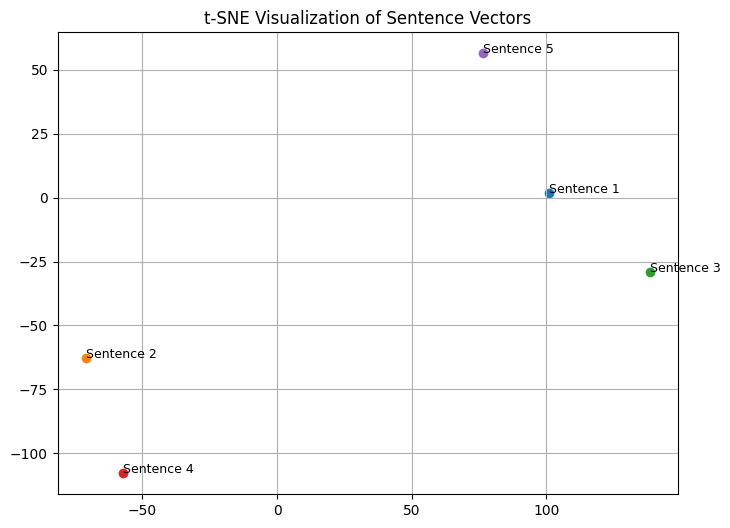

In [139]:
# Convert the list of sentence vectors to a NumPy array
sentence_vectors_array = np.array(sentence_vectors)

# Reduce dimensionality of sentence vectors to 2D using t-SNE with a lower perplexity
tsne = TSNE(n_components=2, perplexity=2, random_state=0)  # Set perplexity to a smaller value
sentence_vec_2d = tsne.fit_transform(sentence_vectors_array)

# Plot the 2D sentence vectors
plt.figure(figsize=(8, 6))
for i, sentence in enumerate(sentences):
    plt.scatter(sentence_vec_2d[i, 0], sentence_vec_2d[i, 1])
    plt.text(sentence_vec_2d[i, 0] + 0.03, sentence_vec_2d[i, 1], f"Sentence {i+1}", fontsize=9)

plt.title("t-SNE Visualization of Sentence Vectors")
plt.grid(True)
plt.show()